In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [2]:
Data = pd.read_csv("Precos_Imoveis.csv")

In [3]:
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.DataFrame(data = {"Nulos": Data.isna().sum()})

,Nulos
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [5]:
pd.DataFrame(data = {"Correlacao": Data.corr()["SalePrice"]}).sort_values(by = "Correlacao", ascending = False)

,Correlacao
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [6]:
def Variable_Number(Data):
    N_Obj = list()
    N_Num = list()
    for Col in Data.columns:
        if(Data[Col].dtypes == "O"):
            N_Obj.append(Col)
        else:
            N_Num.append(Col)
    return N_Obj, N_Num

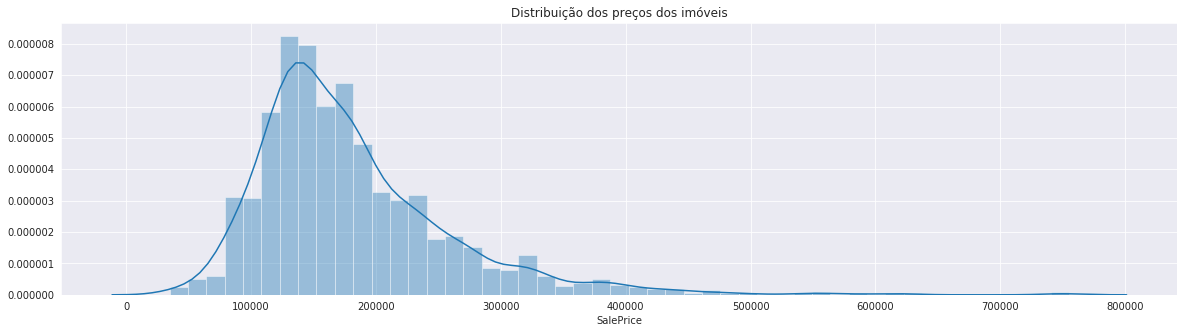

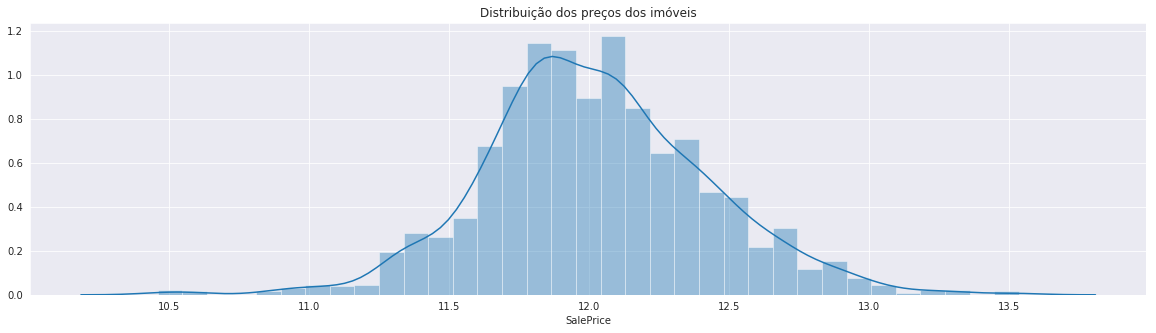

In [7]:
plt.figure(figsize = (20, 5))
sns.distplot(Data["SalePrice"])
plt.title("Distribuição dos preços dos imóveis")
plt.show()
plt.figure(figsize = (20, 5))
sns.distplot(np.log1p(Data["SalePrice"]))
plt.title("Distribuição dos preços dos imóveis")
plt.show()

Text(0.5, 1.0, 'Relação entre preços dos imóveis e qualidade dos mesmos')

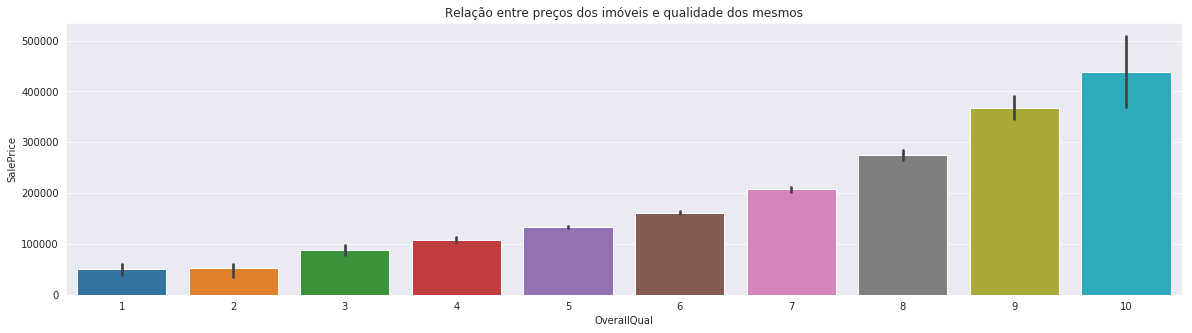

In [8]:
plt.figure(figsize = (20, 5))
sns.barplot(Data["OverallQual"], Data["SalePrice"])
plt.title("Relação entre preços dos imóveis e qualidade dos mesmos")

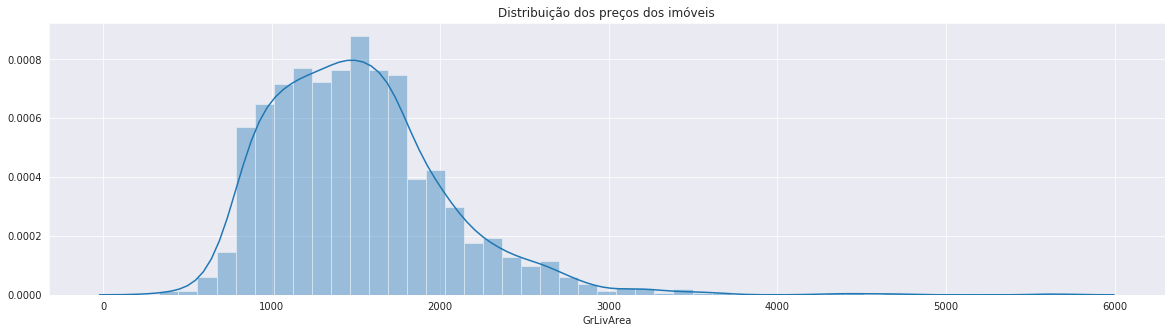

Text(0.5, 1.0, 'Distribuição dos preços dos imóveis')

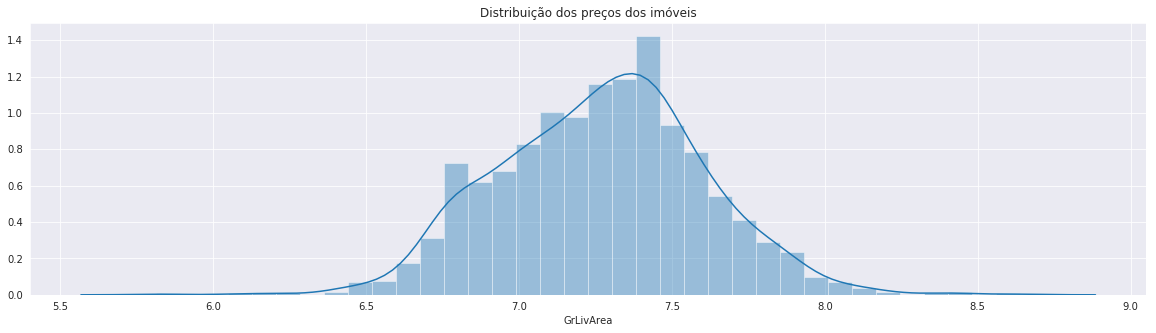

In [9]:
plt.figure(figsize = (20, 5))
sns.distplot(Data["GrLivArea"])
plt.title("Distribuição dos preços dos imóveis")
plt.show()
plt.figure(figsize = (20, 5))
sns.distplot(np.log1p(Data["GrLivArea"]))
plt.title("Distribuição dos preços dos imóveis")

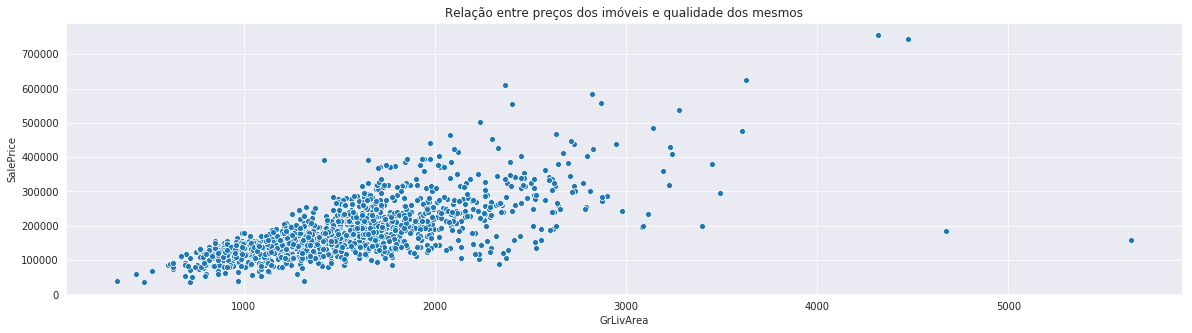

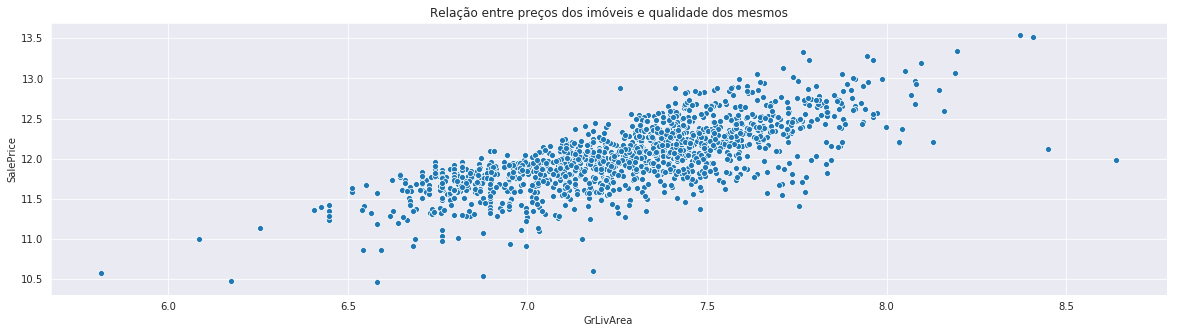

In [10]:
plt.figure(figsize = (20, 5))
sns.scatterplot(Data["GrLivArea"], Data["SalePrice"])
plt.title("Relação entre preços dos imóveis e qualidade dos mesmos")
plt.show()
plt.figure(figsize = (20, 5))
sns.scatterplot(np.log1p(Data["GrLivArea"]), np.log1p(Data["SalePrice"]))
plt.title("Relação entre preços dos imóveis e qualidade dos mesmos")
plt.show()

In [11]:
def Remove_Null_Data():
    Data["Alley"] = Data["Alley"].fillna("No Alley")
    Data["MasVnrType"] = Data["MasVnrType"].fillna("No Masonry")
    Data["BsmtQual"] = Data["BsmtQual"].fillna("No Basement")
    Data["BsmtCond"] = Data["BsmtCond"].fillna("No Basement")
    Data["BsmtExposure"] = Data["BsmtExposure"].fillna("No Basement")
    Data["BsmtFinType1"] = Data["BsmtFinType1"].fillna("No Basement")
    Data["BsmtFinType2"] = Data["BsmtFinType2"].fillna("No Basement")
    Data["FireplaceQu"] = Data["FireplaceQu"].fillna("No Fireplace")
    Data["GarageType"] = Data["GarageType"].fillna("No Garage")
    Data["GarageFinish"] = Data["GarageFinish"].fillna("No Garage")
    Data["GarageQual"] = Data["GarageQual"].fillna("No Garage")
    Data["GarageCond"] = Data["GarageCond"].fillna("No Garage")
    Data["PoolQC"] = Data["PoolQC"].fillna("No Pool")
    Data["Fence"] = Data["Fence"].fillna("No Fence")
    Data["MiscFeature"] = Data["MiscFeature"].fillna("No Miscellaneous")
    Data["Electrical"] = Data["Electrical"].fillna("No Electrical")
    Data["LotFrontage"] = Data["LotFrontage"].fillna(Data["LotFrontage"].mean())
    Data["GarageYrBlt"] = Data["GarageYrBlt"].fillna(Data["GarageYrBlt"].mean())
    Data["MasVnrArea"] = Data["MasVnrArea"].fillna(Data["MasVnrArea"].mean())

In [12]:
Remove_Null_Data()

In [13]:
Data.isna().sum().sum()

0

In [14]:
Data["SalePrice"] = np.log1p(Data["SalePrice"])
Data["GrLivArea"] = np.log1p(Data["GrLivArea"])

In [15]:
pd.DataFrame(data = {"Correlacao": Data.corr()["SalePrice"]}).sort_values(by = "Correlacao", ascending = False)

,Correlacao
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.730254
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


In [16]:
Data_Dum = pd.get_dummies(Data)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = Data_Dum.drop(columns = ["Id", "SalePrice"])
Y = Data_Dum["SalePrice"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [21]:
Models = [RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor()]
Labels = ["Random Forests", "Gradient Boosting", "XGB Regressor", "Média"]

def Train_Test_Model(X, Y):
    Outs = list()
    Errors = list()
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    for I, Model in enumerate(Models):
        Model.fit(x_train, y_train)
        Outs.append(Model.predict(x_test))
        plt.figure(figsize = (20, 5))
        plt.title(Labels[I])
        sns.scatterplot(y_test, Outs[-1])
        sns.scatterplot(y_test, y_test)
        plt.show()
        Errors.append(np.sqrt(mean_squared_error(y_test, Outs[-1])))
        print("Erro " + Labels[I] + ": " + str(Errors[-1]))
    Errors.append(np.sqrt(mean_squared_error(y_test, (Outs[0] + Outs[1] + Outs[2])/3)))
    plt.figure(figsize = (20, 5))
    plt.title("Comparação entre resultados")
    sns.barplot(Labels, Errors)

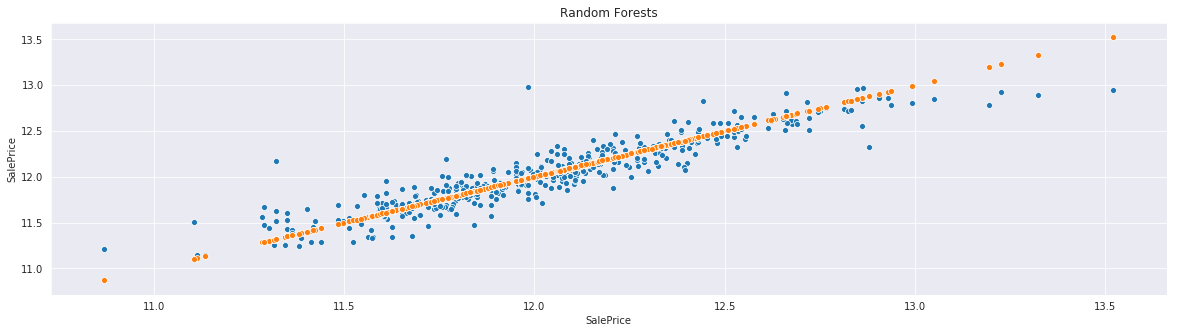

Erro Random Forests: 0.1476430484335379


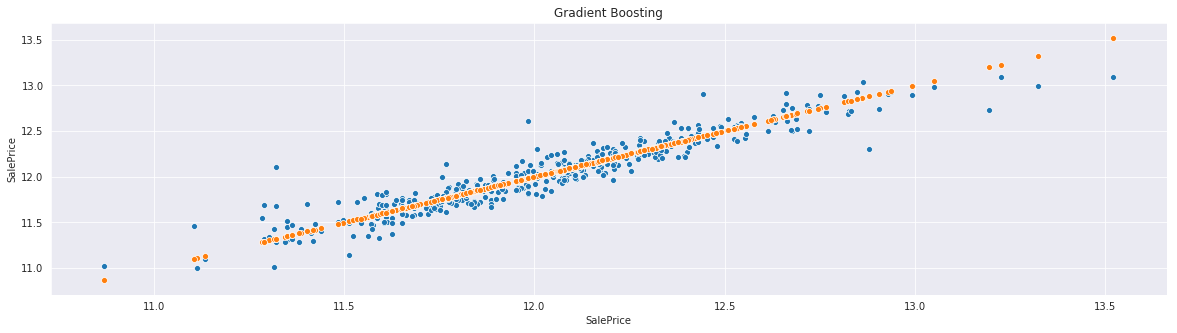

Erro Gradient Boosting: 0.12595406849157773


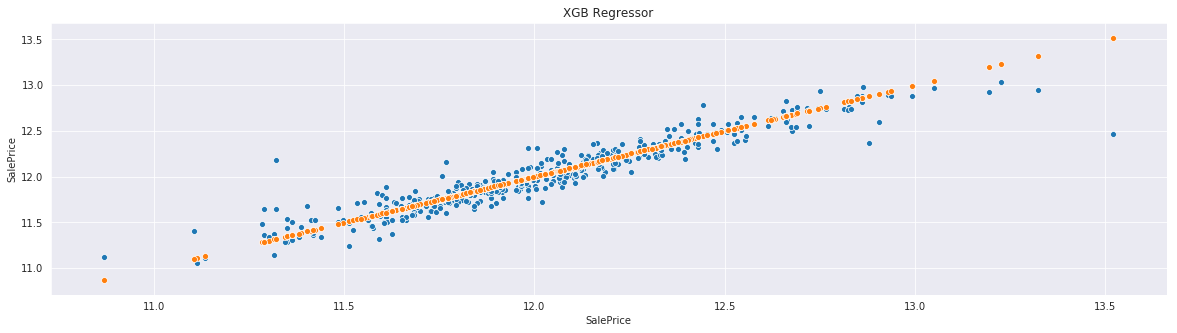

Erro XGB Regressor: 0.12676062118504144


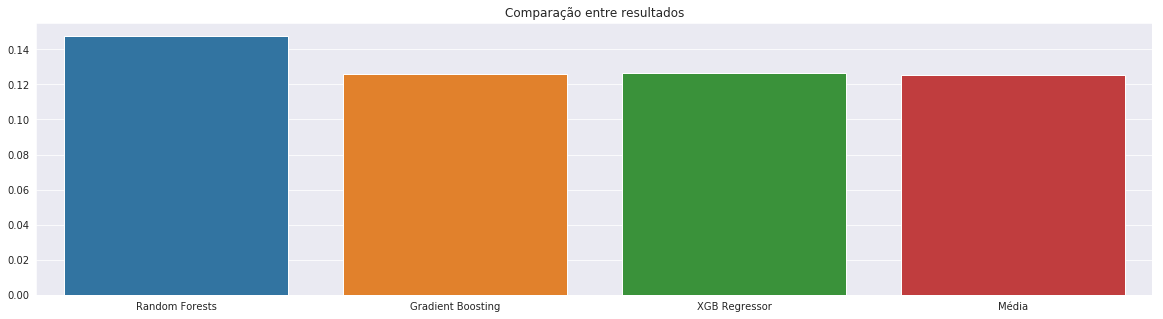

In [22]:
Train_Test_Model(X, Y)

In [23]:
def Feature_Importances():
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    return pd.DataFrame(data = {"Importancia": 100*RFR.feature_importances_}, index = X.columns).sort_values(by = "Importancia", ascending = False)

In [24]:
FI = Feature_Importances()
Sel = (FI["Importancia"] > 1)
FI[Sel]

,Importancia
OverallQual,51.764365
GrLivArea,12.376801
TotalBsmtSF,4.197219
GarageCars,2.812515
GarageArea,2.715031
CentralAir_Y,2.664433
OverallCond,2.224180
1stFlrSF,1.985740
BsmtFinSF1,1.936016
YearBuilt,1.281364


In [25]:
X_N = X[(Feature_Importances() > 1).index]
Y_N = Y

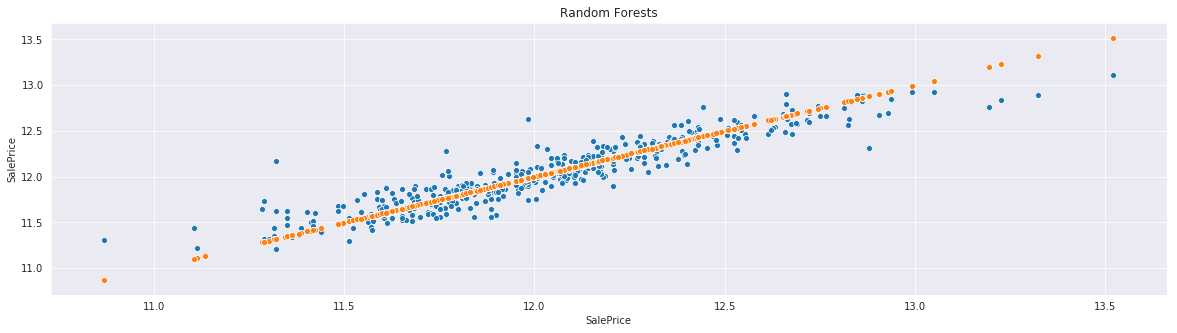

Erro Random Forests: 0.13995016707954158


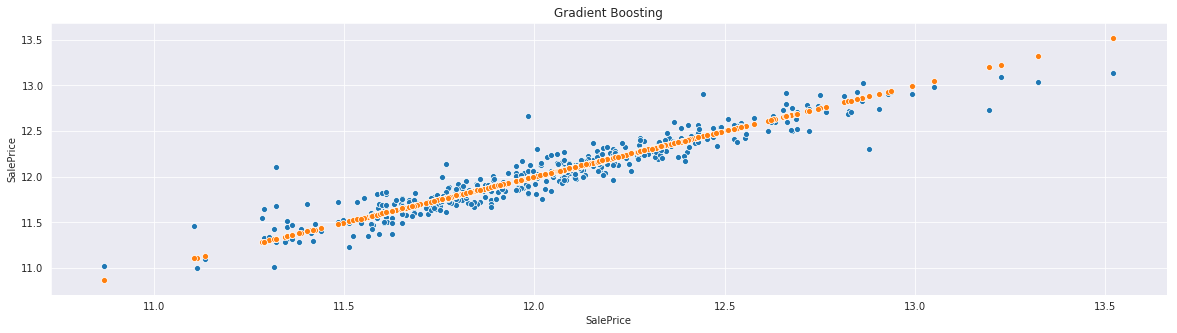

Erro Gradient Boosting: 0.1253647513999093


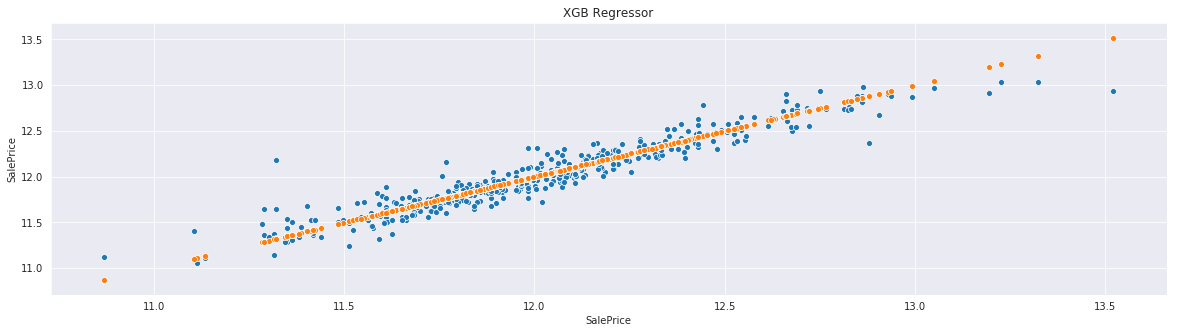

Erro XGB Regressor: 0.11934458896508368


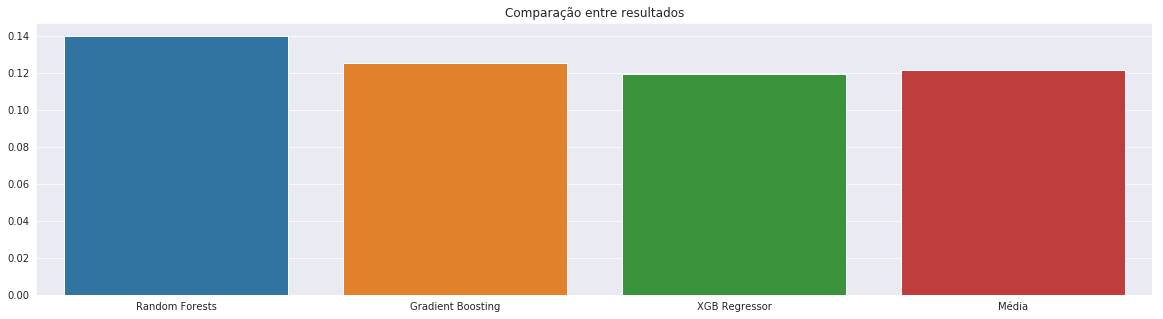

In [26]:
Train_Test_Model(X_N, Y_N)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
def Optimize_XGB_Regressor(X, Y, Parameters):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    XGB = XGBRegressor()
    Grid = GridSearchCV(XGB, Parameters, cv = 2)
    Grid.fit(X, Y)
    XGB = XGBRegressor(**Grid.best_params_)
    XGB.fit(x_train, y_train)
    return np.sqrt(mean_squared_error(y_test, XGB.predict(x_test)))

In [29]:
Parameter = {"n_estimators": [250, 300, 350], 
             "max_depth": [4, 5, 6], 
             "learning_rate": [0.05, 0.1, 0.125, 0.200], 
             "n_jobs": [4],
             "gamma": [0, 1, 2]}

In [30]:
Optimize_XGB_Regressor(X_N, Y_N, Parameter)

0.114669238718496